<a href="https://colab.research.google.com/github/Leox48/Disinformation-Threat-Intelligence/blob/main/Statistiche_di_reperibilit%C3%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requisiti

In [1]:
!pip install pandas
!pip install openpyxl xlrd

**Import dei dataset**

In [16]:
import pandas as pd

# Specifica il percorso del file Excel
dataset_path = '/content/DatasetFinale.xlsx'
AmericanActionNews_path= '/content/American Action News RAW.xlsx'
ViralFakeNews_path= '/content/Viral Fake News RAW.xlsx'

# Leggi il file Excel in un DataFrame
df = pd.read_excel(dataset_path)
AAN_df= pd.read_excel(AmericanActionNews_path)
ViralFakeNews_df = pd.read_excel(ViralFakeNews_path)
# Visualizza le prime righe del DataFrame per verificare che sia stato letto correttamente
#print(df.head(3))
#print(AAN_df.head(3))

# Stampa i nomi delle colonne
#print(df.columns)

**Percentuale di raggiungibilità per American Action News**

In [15]:
numero_righe_AAN = AAN_df.shape[0] +1
#Il +1 è perché c'è un articolo in più non presente nel dataset di partenza

print(f"Il numero totale di righe di American Action News è: {numero_righe_AAN}")

# Filtra il DataFrame per le righe dove la colonna "Campagna" è uguale a "American Action News"
filtrato = df.loc[df['CAMPAGNA'] == 'American Action News']

# Ottieni il numero di righe del DataFrame filtrato
numero_righe_filtrate = filtrato.shape[0]

print(f"Il numero di righe presenti nel dataset per la Campagna AAN è: {numero_righe_filtrate}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_AAN = (numero_righe_filtrate / numero_righe_AAN) * 100

print(f"La percentuale di notizie raggiunte per American Action News è: {percentuale_ragg_AAN}")

Il numero totale di righe di American Action News è: 173
Il numero di righe presenti nel dataset per la Campagna AAN è: 104
La percentuale di notizie raggiunte per American Action News è: 60.115606936416185


**Percentuale di raggiungibilità per Viral Fake Election News**

In [18]:
numero_righe_Viral = ViralFakeNews_df.shape[0]

print(f"Il numero totale di righe di Viral Fake News è: {numero_righe_Viral}")

# Filtra il DataFrame per le righe dove la colonna "Campagna" è uguale a "Viral Fake Election News"
filtrato = df.loc[df['CAMPAGNA'] == 'Viral Fake Election News ']

# Ottieni il numero di righe del DataFrame filtrato
numero_righe_filtrate = filtrato.shape[0]

print(f"Il numero di righe presenti nel dataset per la Campagna ViralFakeNews è: {numero_righe_filtrate}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_ViralFake = (numero_righe_filtrate / numero_righe_Viral) * 100

print(f"La percentuale di notizie raggiunte per Viral Fake News News è: {percentuale_ragg_ViralFake}")

Il numero totale di righe di Viral Fake News è: 60
Il numero di righe presenti nel dataset per la Campagna ViralFakeNews è: 57
La percentuale di notizie raggiunte per Viral Fake News News è: 95.0


**Percentuale di raggiungibilità per Hyperpartisan in 2016 American politic Elections**

**DA FARE**

**Percentuale di raggiungibilità per Russian Troll account**

In [20]:
RussianTrolls_path= '/content/Russian Trolls RAW.xlsx'

# Leggi il file Excel in un DataFrame
Russian_df = pd.read_excel(RussianTrolls_path)

numero_righe_Russian = Russian_df.shape[0]

print(f"Il numero totale di righe di Russian Trolls è: {numero_righe_Russian}")

# Filtra il DataFrame per le righe dove la colonna "Campagna" è uguale a "Viral Fake Election News"
filtrato = df.loc[df['CAMPAGNA'] == 'Russian troll accounts during 2016 U.S. presidential election']

# Ottieni il numero di righe del DataFrame filtrato
numero_righe_filtrate = filtrato.shape[0]

print(f"Il numero di righe presenti nel dataset per la Campagna Russian Troll Accounts 2016 è: {numero_righe_filtrate}")

# Calcola la percentuale delle righe filtrate rispetto al totale delle righe
percentuale_ragg_Russian = (numero_righe_filtrate / numero_righe_Russian) * 100

print(f"La percentuale di notizie raggiunte per Viral Fake News News è: {percentuale_ragg_Russian}")

Il numero totale di righe di Russian Trolls è: 11451
Il numero di righe presenti nel dataset per la Campagna Russian Troll Accounts 2016 è: 11451
La percentuale di notizie raggiunte per Viral Fake News News è: 100.0


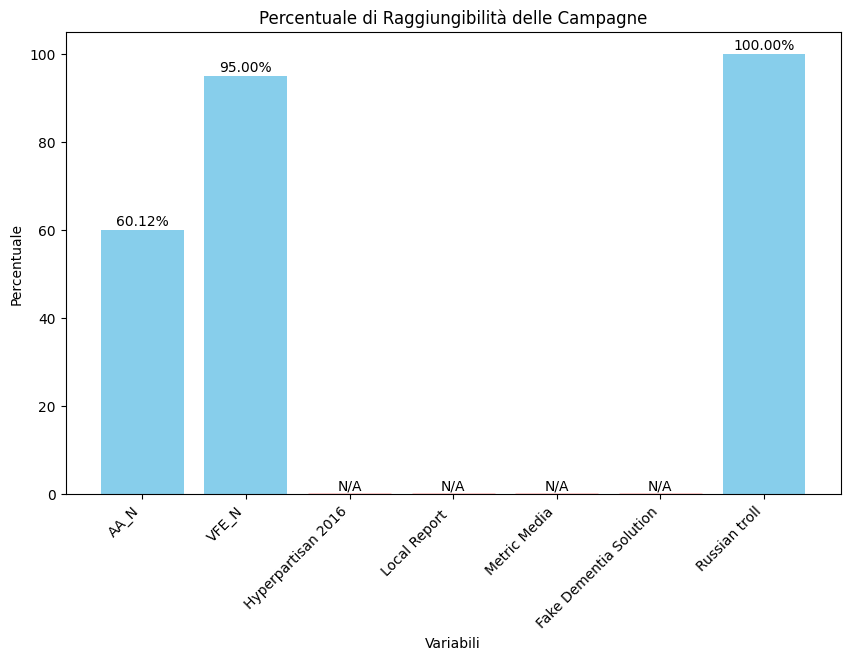

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo di avere queste variabili percentuali
dati = {
    'Variabile': ['AA_N', 'VFE_N', 'Hyperpartisan 2016', 'Local Report ', 'Metric Media', 'Fake Dementia Solution', 'Russian troll'],
    'Percentuale': [percentuale_ragg_AAN, percentuale_ragg_ViralFake, None, None, None, None, percentuale_ragg_Russian]
}

# Creiamo un DataFrame
df_Plot = pd.DataFrame(dati)

# Gestiamo i valori N/A
df_Plot['Percentuale'] = df_Plot['Percentuale'].fillna(0)  # Sostituiamo N/A con 0 per plottare
n_a_indices = df_Plot[df_Plot['Percentuale'] == 0].index  # Indici dei valori N/A

# Creiamo un grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(df_Plot['Variabile'], df_Plot['Percentuale'], color='skyblue')

# Colore diverso per i valori N/A
for i in n_a_indices:
    bars[i].set_color('red')

# Aggiungiamo titoli e etichette
plt.title('Percentuale di Raggiungibilità delle Campagne')
plt.xlabel('Variabili')
plt.ylabel('Percentuale')

# Aggiungiamo le percentuali sopra le barre
for index, value in enumerate(df_Plot['Percentuale']):
    label = 'N/A' if index in n_a_indices else f'{value:.2f}%'  # Formattiamo il valore a due cifre decimali
    plt.text(index, value + 1, label, ha='center')


# Ruotiamo le etichette delle x
plt.xticks(rotation=45, ha='right')

# Mostriamo il grafico
plt.show()
